# CMPT459 final project EDA

In [135]:
# import library and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [136]:
# load dataset
data_path = '../data/processed/data_for_eda.csv' 
data = pd.read_csv(data_path)

In [137]:
# Data Overview
print("Dataset Overview:")
print(data.info())
print("\nSample Data:\n", data.head())
print("\nDescriptive Statistics:\n", data.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation    

In [138]:
# Target Distribution
x = data['Target'].value_counts().index
y = data['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count_T',
            title='Target Distribution')

fig.update_traces(labels=['Not Dropout','Dropout'], hole=0.2,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

In [139]:
# how many unique values for each column
print(data.nunique())

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Previous qualification (grade)                    101
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Scholarship holder                                  2
Age at enrollment                                  46
International               

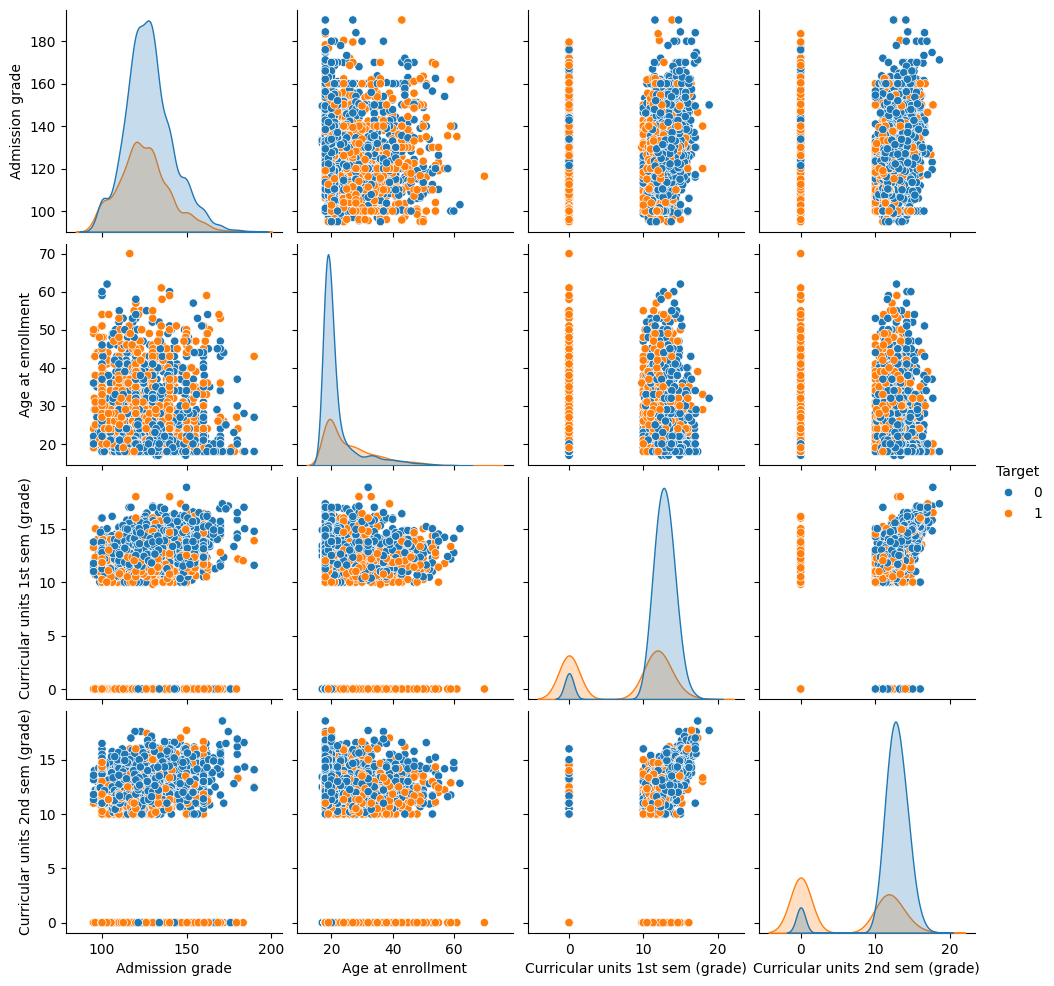

In [140]:
selected_features = ['Admission grade', 'Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Target']

sns.pairplot(data[selected_features], hue='Target')
plt.show()

array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance'}>,
        <Axes: title={'center': 'Previous qualification'}>],
       [<Axes: title={'center': 'Previous qualification (grade)'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>,
        <Axes: title={'center': 'Admission grade'}>],
       [<Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Scholarship holder'}>,
        <Axes: title={'center': 'Age at enr

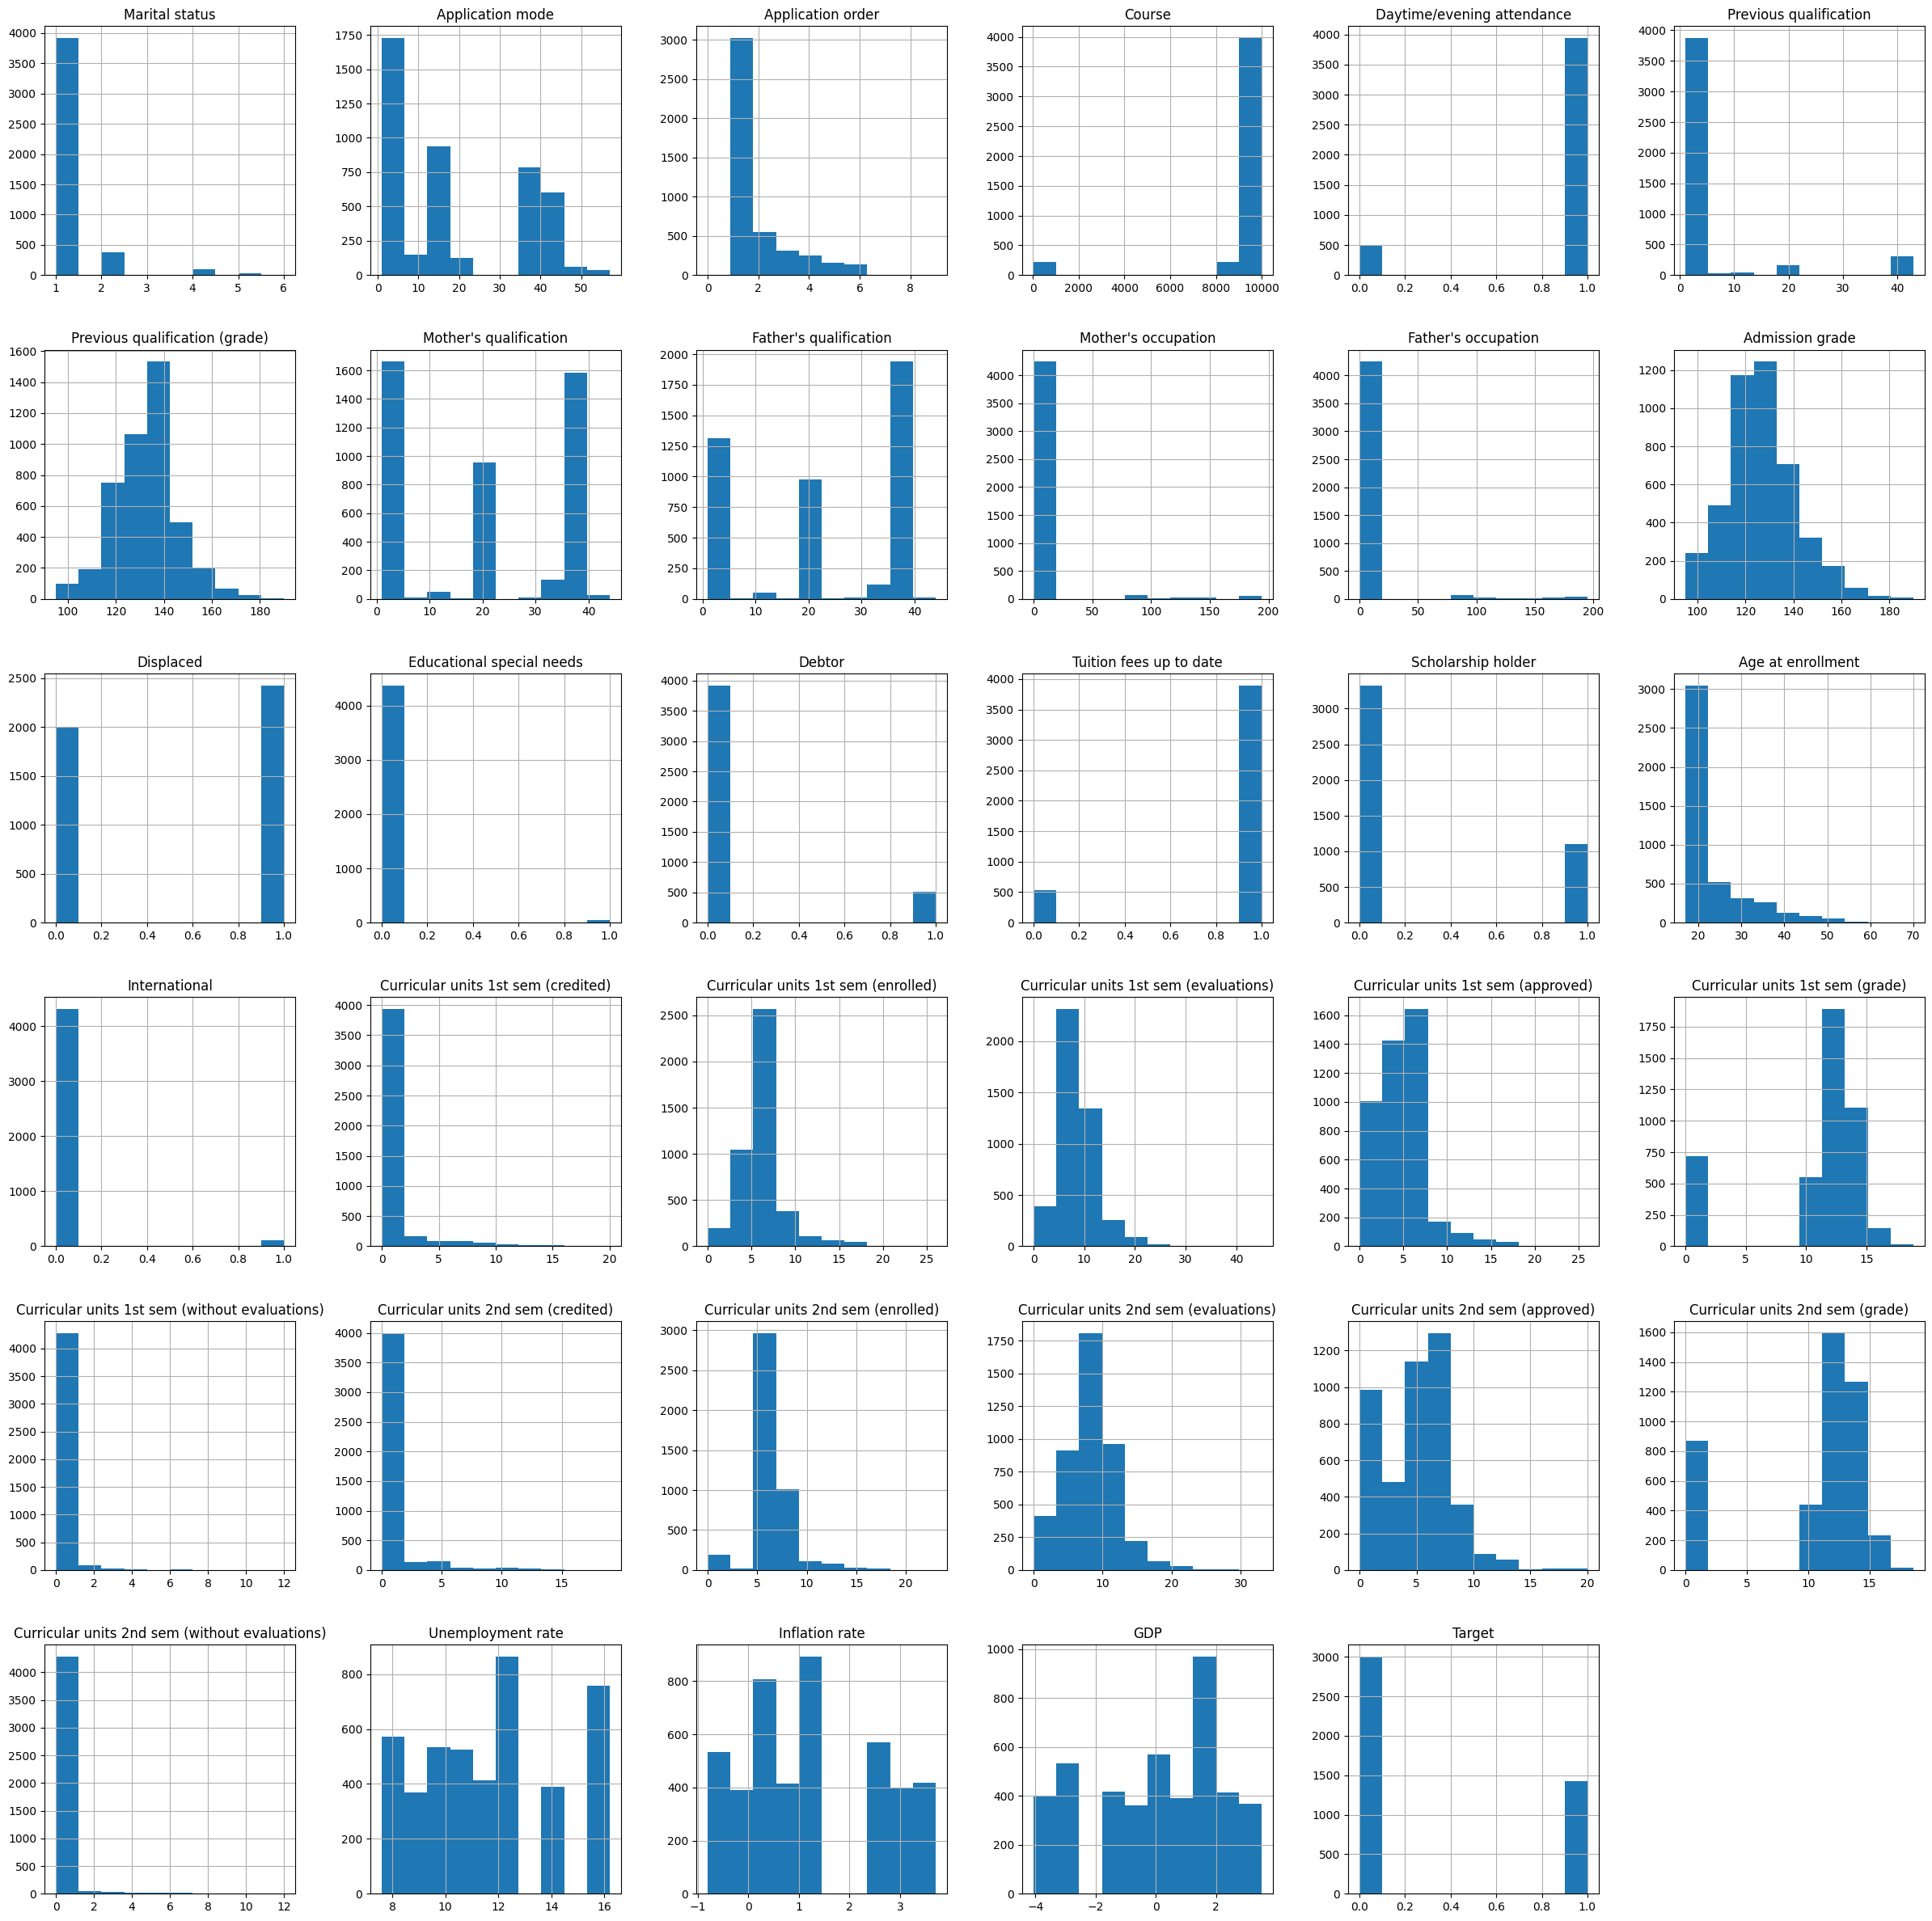

In [141]:
#Plot distributions of key features using histograms, box plots, etc.
# Histograms for all columns in a nice way
data.hist(figsize=(30,30))

<Axes: >

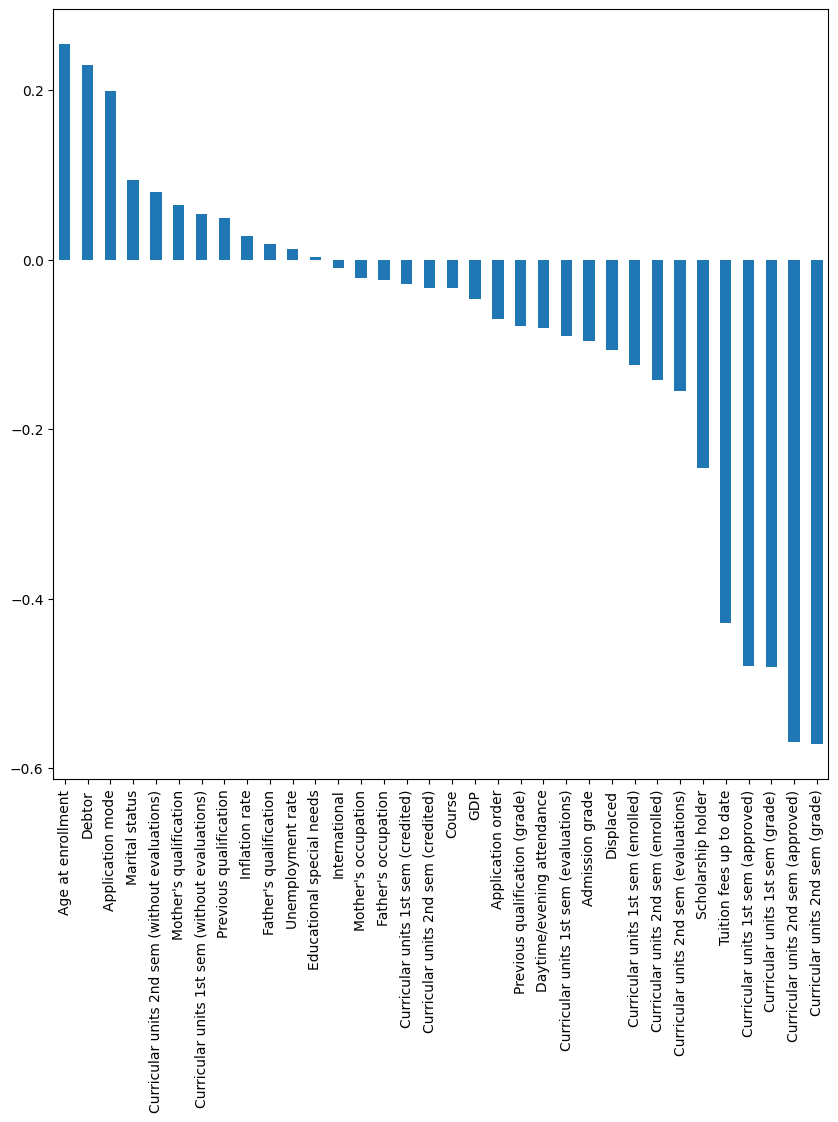

In [142]:
# correlation between features and Target column
corr = data.corr()
# bar plot of correlation between features and Target column
plt.figure(figsize=(10,10))
# exclude Target column
corr = corr.drop('Target')
corr['Target'].sort_values(ascending=False).plot(kind='bar')



<Axes: >

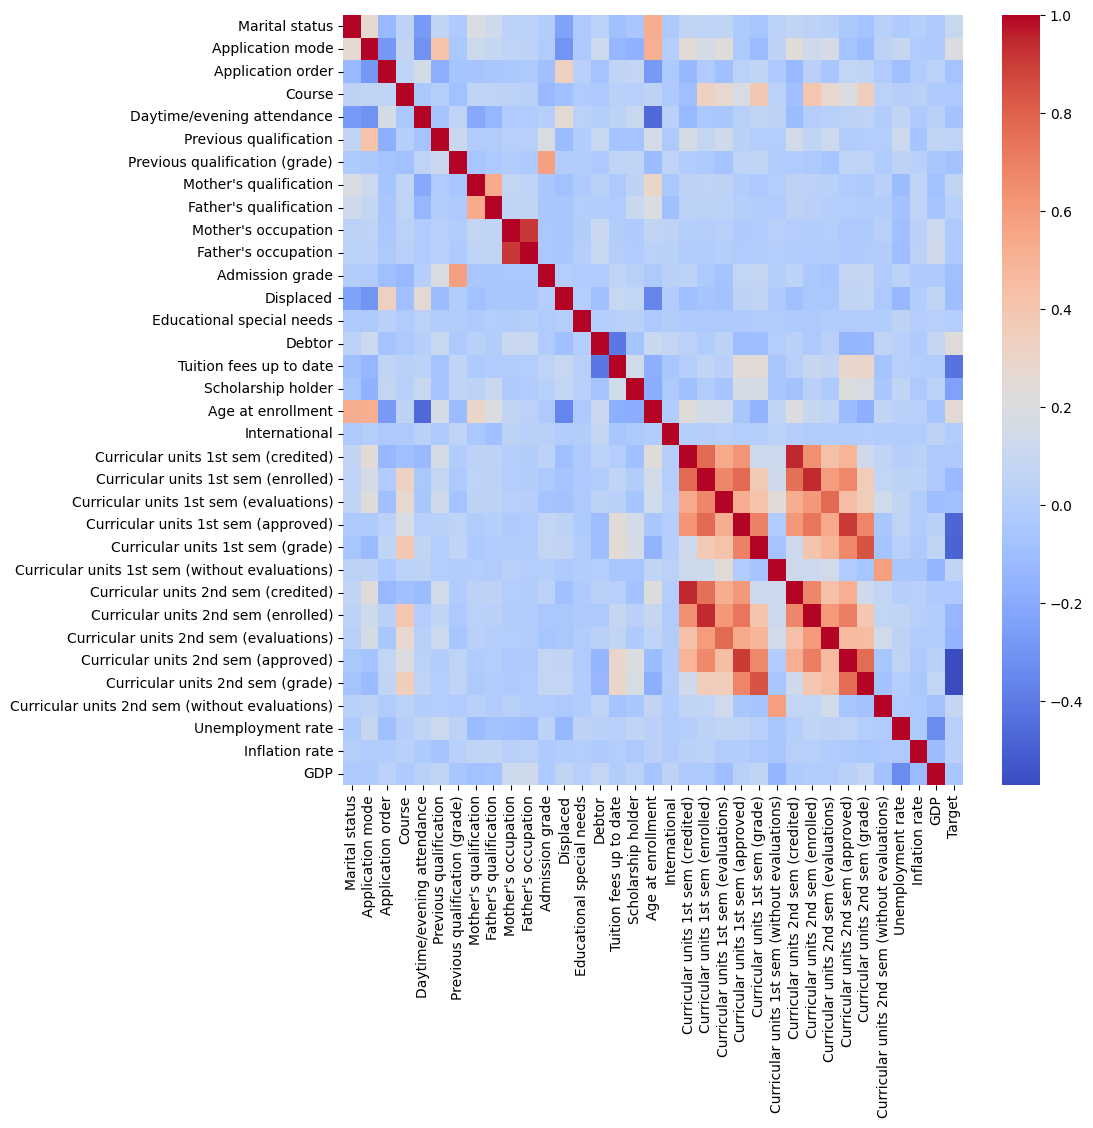

In [143]:
# Visualize relationships between features and identify correlations using heatmaps.
plt.figure(figsize=(10,10))
# positive correlation -> red
# negative correlation -> blue
# no correlation -> white
# do not display numbers in the heatmap
sns.heatmap(corr, annot=False, cmap='coolwarm')
